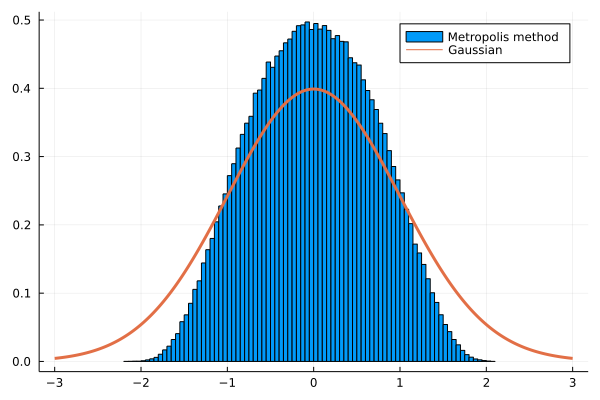

  0.521132 seconds (9.09 M allocations: 234.758 MiB, 32.86% gc time, 7.43% compilation time)


Main.Original

In [1]:
"""https://github.com/moruten/julia-code/blob/99b50bf329195ba102a9496602a22138f07d186b/Test-2021-8-12-no6.ipynb"""
module Original

using Plots
using Random

function any_width_rand!(n_rand,width_l,width_r)
    rands=zeros(n_rand)
    L=width_r - width_l
    for i=1:n_rand
        rands[i] = width_l + L*rand()
    end
    return rands
end

function action_cal(x)
    exp(0.5*x^2)
end

function MP_test(x_ini,x_pro)
    S_ini = action_cal(x_ini)
    S_pro = action_cal(x_pro)
    
    if exp(S_ini - S_pro) > rand()
        return x_pro
    else 
        return x_ini
    end
end

n_rand=1_000_000

MP_rands=zeros(n_rand)

x_propose  = 0.0
x_ini      = 0.0
width_rand = 2.0

@time for i=2:n_rand
    x_propose   = x_ini + any_width_rand!(1,-width_rand,width_rand)[1]
    MP_rands[i] = MP_test(x_ini,x_propose)
    global x_ini       = MP_rands[i]
end

f(x) = exp(-0.5*x^2)/sqrt(2*pi)
xr   = range(-3,3,length=10001)

plot(MP_rands,st=:histogram,norm=:true,nbins=100,label="Metropolis method")
plot!(xr,f.(xr),lw=3,label="Gaussian") |> display

end

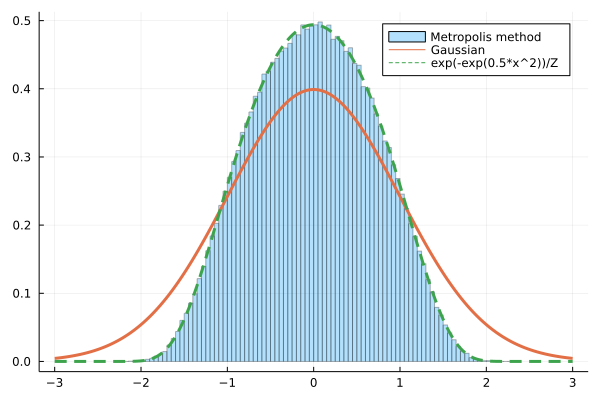

  0.354425 seconds (9.02 M allocations: 230.194 MiB, 7.26% gc time, 5.38% compilation time)


Main.Original_plus

In [2]:
"""https://github.com/moruten/julia-code/blob/99b50bf329195ba102a9496602a22138f07d186b/Test-2021-8-12-no6.ipynb"""
module Original_plus

using Plots
using Random

function any_width_rand!(n_rand,width_l,width_r)
    rands=zeros(n_rand)
    L=width_r - width_l
    for i=1:n_rand
        rands[i] = width_l + L*rand()
    end
    return rands
end

function action_cal(x)
    exp(0.5*x^2)
end

function MP_test(x_ini,x_pro)
    S_ini = action_cal(x_ini)
    S_pro = action_cal(x_pro)
    
    if exp(S_ini - S_pro) > rand()
        return x_pro
    else 
        return x_ini
    end
end

n_rand=1_000_000

MP_rands=zeros(n_rand)

x_propose  = 0.0
x_ini      = 0.0
width_rand = 2.0

@time for i=2:n_rand
    x_propose   = x_ini + any_width_rand!(1,-width_rand,width_rand)[1]
    MP_rands[i] = MP_test(x_ini,x_propose)
    global x_ini       = MP_rands[i]
end

f(x) = exp(-0.5*x^2)/sqrt(2*pi)
xr   = range(-3,3,length=10001)

using QuadGK
G(x) = exp(-exp(0.5*x^2))
Z = quadgk(G, -Inf, Inf)[1]
g(x) = G(x)/Z

histogram(MP_rands, norm=true, nbins=100, label="Metropolis method", alpha=0.3)
plot!(xr, f.(xr), lw=3, label="Gaussian")
plot!(xr, g.(xr), lw=3, label="exp(-exp(0.5*x^2))/Z", ls=:dash) |> display

end

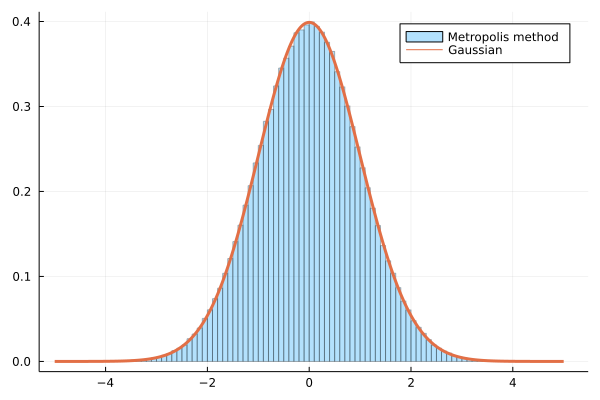

  0.334502 seconds (9.02 M allocations: 230.187 MiB, 8.51% gc time, 5.72% compilation time)


Main.Corrected

In [3]:
module Corrected

using Plots
using Random

function any_width_rand!(n_rand,width_l,width_r)
    rands=zeros(n_rand)
    L=width_r - width_l
    for i=1:n_rand
        rands[i] = width_l + L*rand()
    end
    return rands
end

function action_cal(x)
    exp(0.5*x^2)
end

function MP_test(x_ini,x_pro)
    S_ini = action_cal(x_ini)
    S_pro = action_cal(x_pro)
    
    if S_ini / S_pro > rand() # <-- 変更はこの行だけ！
        return x_pro
    else 
        return x_ini
    end
end

n_rand=1_000_000

MP_rands=zeros(n_rand)

x_propose  = 0.0
x_ini      = 0.0
width_rand = 2.0

@time for i=2:n_rand
    x_propose   = x_ini + any_width_rand!(1,-width_rand,width_rand)[1]
    MP_rands[i] = MP_test(x_ini,x_propose)
    global x_ini       = MP_rands[i]
end

f(x) = exp(-0.5*x^2)/sqrt(2*pi)
xr   = range(-5,5,length=10001)

plot(MP_rands,st=:histogram,norm=:true,nbins=100,label="Metropolis method", alpha=0.3)
plot!(xr,f.(xr),lw=3,label="Gaussian") |> display

end

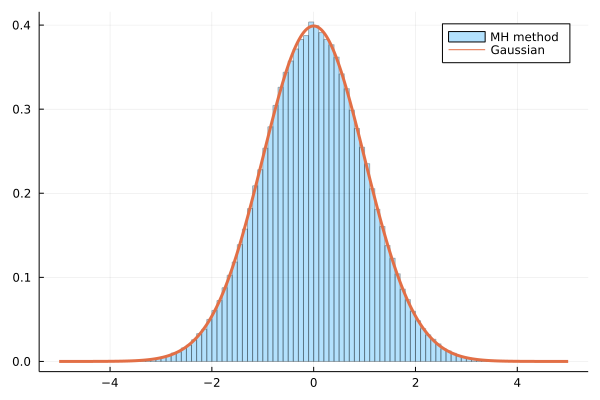

  0.350425 seconds (9.02 M allocations: 230.234 MiB, 9.47% gc time, 6.06% compilation time)


Main.MH

In [4]:
module MH

using Plots
using Random

function any_width_rand!(n_rand,width_l,width_r)
    rands=zeros(n_rand)
    L=width_r - width_l
    for i=1:n_rand
        rands[i] = width_l + L*rand()
    end
    return rands
end

function action_cal(x)
    exp(0.5*x^2)
end

function MP_test(x_ini,x_pro)
    S_ini = action_cal(x_ini)
    S_pro = action_cal(x_pro)
    a = S_ini/S_pro
    if a > 1 || rand() ≤ a
        return x_pro
    else 
        return x_ini
    end
end

n_rand=1_000_000

MP_rands=zeros(n_rand)

x_propose  = 0.0
x_ini      = 0.0
width_rand = 2.0

@time for i=2:n_rand
    x_propose   = x_ini + any_width_rand!(1,-width_rand,width_rand)[1]
    MP_rands[i] = MP_test(x_ini,x_propose)
    global x_ini       = MP_rands[i]
end

f(x) = exp(-0.5*x^2)/sqrt(2*pi)
xr   = range(-5,5,length=10001)

plot(MP_rands,st=:histogram,norm=:true,nbins=100,label="MH method", alpha=0.3)
plot!(xr,f.(xr),lw=3,label="Gaussian") |> display

end